# Aerofit Case Study: Project

# Aerofit is a leading brand in the field of fitness equipment. The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers.

In [743]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
from scipy.special import comb
from scipy.stats import binom, norm, poisson, expon

In [662]:
aerofit = pd.read_csv("C:/DSML Practice DataSet/aerofit_treadmill.txt")
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [664]:
aerofit.shape

(180, 9)

In [666]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [668]:
aerofit.isnull().sum().sum()

0

In [670]:
aerofit.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


# Data Observation:
1. Aerofit Costomers' <b>Average age 28 years and Median age 26 years</b>
2. The customers have on average <b>16 years of education</b>
3. The customers are using treadmill <b>3 times a week on an average</b>
4. Average fitness rating is <b>3.3 out of 5</b>
5. Difference between the mean and median for columns <b>'Income' and 'Miles'</b> is huge which indicates there might be outliers.
6. <b>Min and Max Income</b> of the customers are <b>29562 USDD and 104581 USD</b> respectively
1. Min to Max range of miles walked/run is <b>21 to 360 per week</b>

# EDA

In [729]:
aerofit.replace(to_replace={'Male': 'M', 'Female': 'F'}, inplace=True)
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Group,Income_Group
0,KP281,18,M,14,Single,3,4,29562,112,1st group,Low Range
1,KP281,19,M,15,Single,2,3,31836,75,1st group,Low Range
2,KP281,19,F,14,Partnered,4,3,30699,66,1st group,Low Range
3,KP281,19,M,12,Single,3,3,32973,85,1st group,Low Range
4,KP281,20,M,13,Partnered,4,2,35247,47,1st group,Low Range


In [676]:
# Finding out the number of unique values
aerofit.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

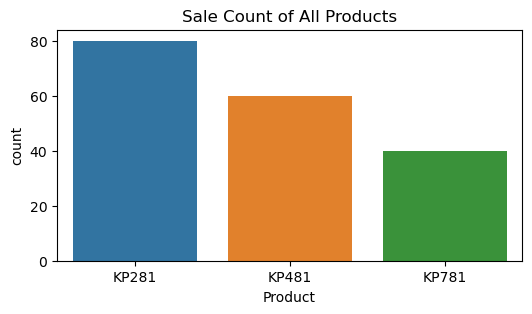

In [678]:
plt.figure(figsize=(6,3))
sns.countplot(x= "Product", data= aerofit)
plt.title('Sale Count of All Products')
plt.show()

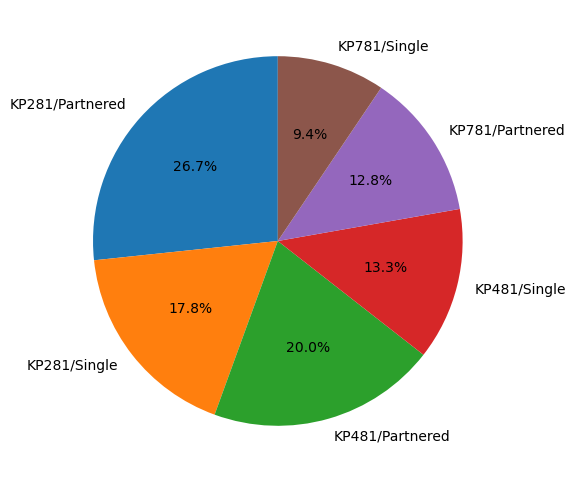

In [680]:
product_and_marriage = aerofit.groupby(['Product', 'MaritalStatus']).size()
plt.figure(figsize=(6,6))
labels = ['KP281/Partnered', 'KP281/Single', 'KP481/Partnered', 
         'KP481/Single', 'KP781/Partnered','KP781/Single']
plt.pie(product_and_marriage,labels=labels, startangle=90, autopct='%2.1f%%')
plt.show()

In [682]:
print(aerofit['Income'].median())
print(aerofit['Income'].mean())

50596.5
53719.57777777778


In [684]:
p_25 = np.percentile(aerofit['Income'], 25)
p_50 = np.percentile(aerofit['Income'], 50)
p_75 = np.percentile(aerofit['Income'], 75)
print(p_25, p_50, p_75)

44058.75 50596.5 58668.0


In [686]:
iqr = p_75-p_25
upper = p_75 +1.5*iqr
lower = p_25 -1.5*iqr
print(iqr, upper, lower)

14609.25 80581.875 22144.875


In [688]:
outlier = aerofit[aerofit['Income']>upper]
len(outlier)

19

<AxesSubplot:>

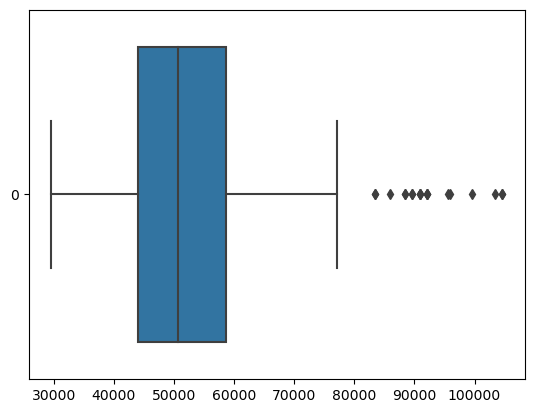

In [690]:
sns.boxplot(data=aerofit['Income'], orient='h') 

# 👆 There are so many outliers in the 'Income' column. High income people are potential customers to make a stronger client base                                          
                                                        

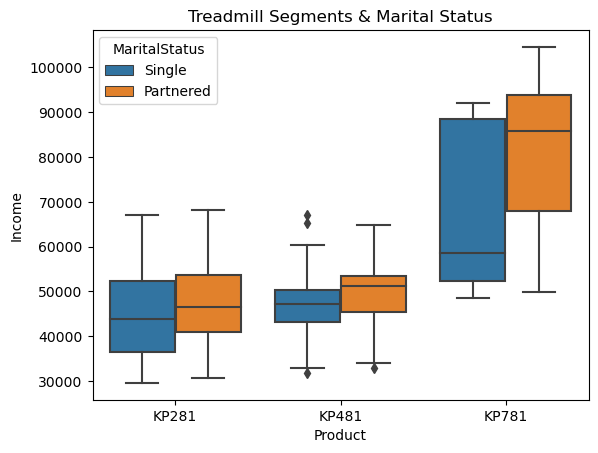

In [692]:
sns.boxplot(data=aerofit, x="Product", y="Income", hue= 'MaritalStatus')
plt.title('Treadmill Segments & Marital Status')
plt.show()

# 👆 People who baught KP781, the income range for single is bigger than partnered custmers. Single people can afford to buy expensive treadmill even with less income than USD7000 per year but not less than USD50000.

In [694]:
# Getting mean and median age of the people who baught high end product
Cx_of_KP781 = aerofit[aerofit['Product']=='KP781']
print(Cx_of_KP781['Age'].mean())
print(Cx_of_KP781['Age'].median())

29.1
27.0


In [696]:
p_25 = np.percentile(Cx_of_KP781['Age'], 25)
p_50 = np.percentile(Cx_of_KP781['Age'], 50)
p_75 = np.percentile(Cx_of_KP781['Age'], 75)
print(p_25, p_50, p_75)

24.75 27.0 30.25


In [698]:
iqr = p_75-p_25
upper = p_75 +1.5*iqr
lower = p_25 -1.5*iqr
print(iqr, upper, lower)

5.5 38.5 16.5


In [700]:
outlier_age = Cx_of_KP781[Cx_of_KP781['Age']>upper]
len(outlier_age)

5

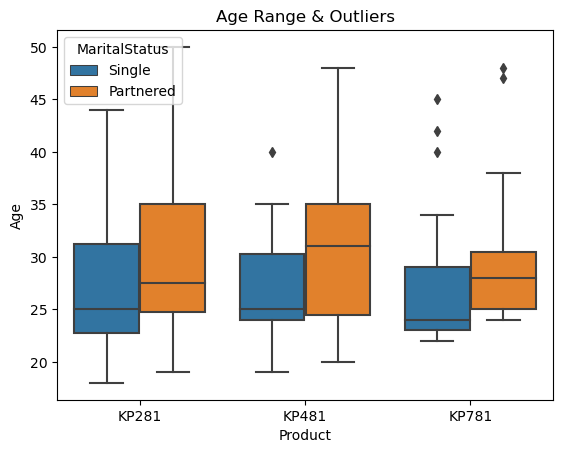

In [702]:
sns.boxplot(x=aerofit["Product"], y=aerofit["Age"], hue= aerofit['MaritalStatus'])
plt.title('Age Range & Outliers')
plt.show()

# 👆 Most of the cx of high end treadmill are young, aged b/w 22 and 38 years. However, there are outliers which shows that people more than 40 years old are also buying the expensive/high quality treadmill (as they have higher income than young people)

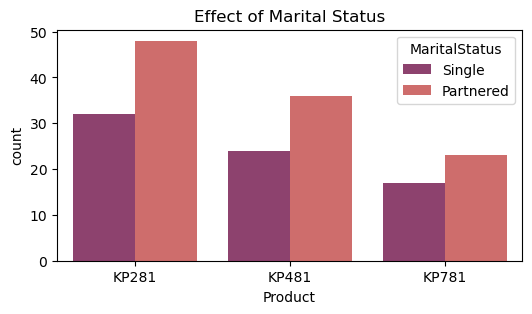

In [704]:
plt.figure(figsize=(6,3))
sns.countplot(x= "Product", data= aerofit, hue= 'MaritalStatus', palette= 'flare_r')
plt.title('Effect of Marital Status')
plt.show()

# 👆 The company has more partnered customer than single in all segments of treadmill

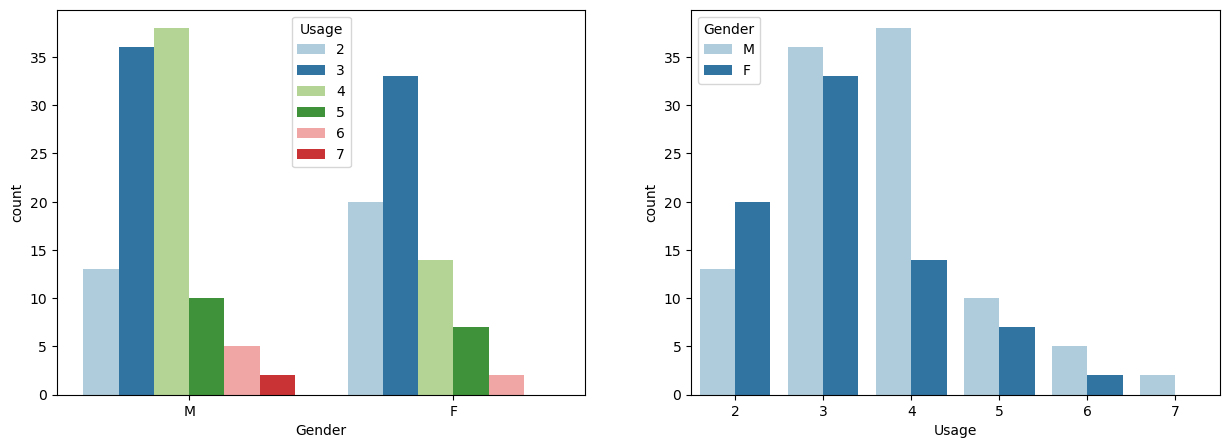

In [740]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(data=aerofit, x='Gender', hue='Usage', ax=axes[0], palette='Paired')
sns.countplot(data=aerofit, x='Usage', hue='Gender', ax=axes[1], palette='Paired')
plt.show()

- Usage per week of males is higher than that of females.

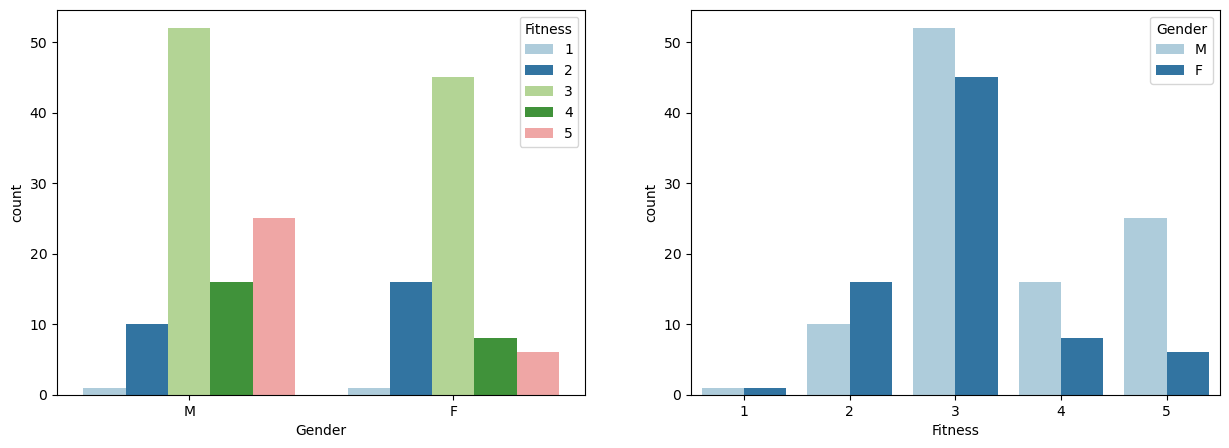

In [741]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(data=aerofit, x='Gender', hue='Fitness', ax=axes[0], palette='Paired')
sns.countplot(data=aerofit, x='Fitness', hue='Gender', ax=axes[1], palette='Paired')
plt.show()

- Males have mostly rated themselves higher on fitness level

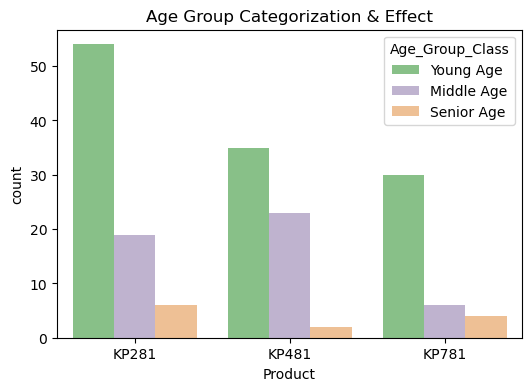

In [731]:
bins = [18, 30, 40, 51]
labels = ['Young Age', 'Middle Age', 'Senior Age']
aerofit['Age_Group_Class'] = pd.cut(aerofit['Age'], 
                                    bins = bins, labels = labels)
plt.figure(figsize=(6,4))
sns.countplot(x= "Product", data= aerofit, hue= 'Age_Group_Class', palette= 'Accent')
plt.title('Age Group Categorization & Effect')
plt.show()

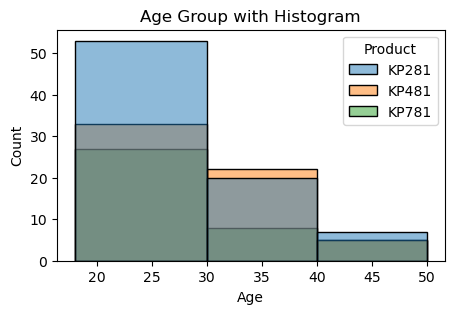

In [708]:
plt.figure(figsize=(5,3))
p
plt.title('Age Group with Histogram')
plt.show()

# 👆 All 3 treadmills have the most customers in Young age group(18-30) and least customers in Senior age group(40-50)

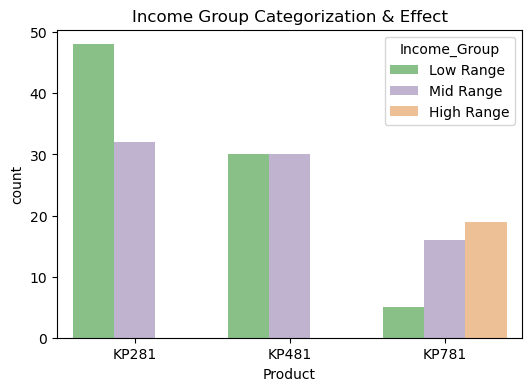

In [709]:
def income(x):
    if x>=29000 and x<=50000:
        return 'Low Range'
    elif x>=50001 and x<=80000:
        return 'Mid Range'
    else:
        return 'High Range' 
aerofit['Income_Group']= aerofit['Income'].apply(income)

plt.figure(figsize=(6,4))
sns.countplot(x= "Product", data= aerofit, hue= 'Income_Group', palette= 'Accent')
plt.title('Income Group Categorization & Effect')
plt.show()

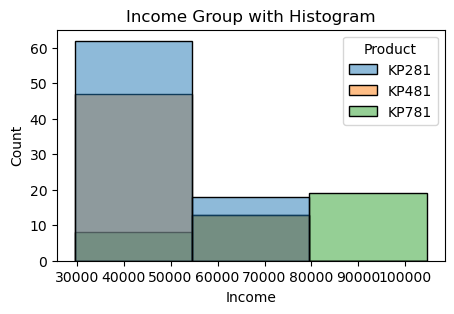

In [710]:
plt.figure(figsize=(5,3))
sns.histplot(x = 'Income', data = aerofit, bins = 3, hue='Product')
plt.title('Income Group with Histogram')
plt.show()

# 👆 High Range Income people are not buying KP481 and KP281

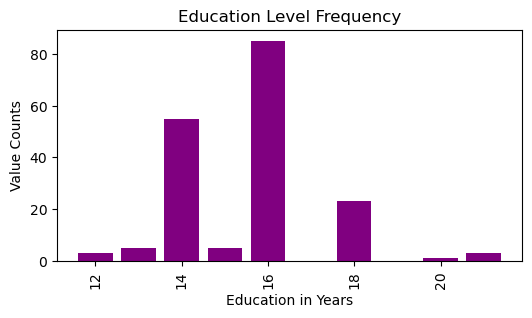

In [711]:
cat_count = aerofit['Education'].value_counts()
x = cat_count.index
y = cat_count
plt.figure(figsize=(6,3))
plt.bar(x, y, width=0.8, color='purple')
plt.xlabel('Education in Years')
plt.ylabel('Value Counts')
plt.title('Education Level Frequency')
plt.xticks(rotation=90)
plt.show()

# 👆Education level of 14,16 and 18 years are the most common among Aerofit's consumer

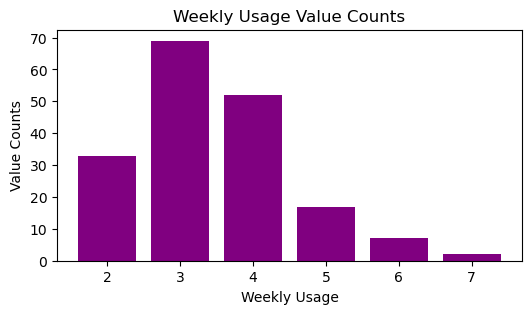

In [734]:
usage_count = aerofit['Usage'].value_counts()
x = usage_count.index
y = usage_count
plt.figure(figsize=(6,3))
plt.bar(x, y, width=0.8, color='purple')
plt.xlabel('Weekly Usage')
plt.ylabel('Value Counts')
plt.title('Weekly Usage Value Counts')
plt.show()

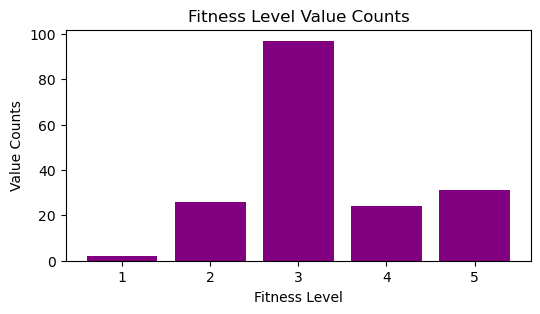

In [736]:
usage_count = aerofit['Fitness'].value_counts()
x = usage_count.index
y = usage_count
plt.figure(figsize=(6,3))
plt.bar(x, y, width=0.8, color='purple')
plt.xlabel('Fitness Level')
plt.ylabel('Value Counts')
plt.title('Fitness Level Value Counts')
plt.show()

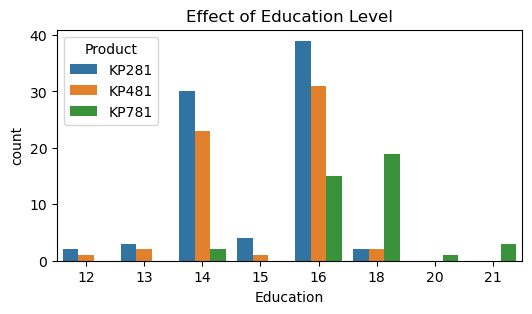

In [713]:
plt.figure(figsize=(6,3))
sns.countplot(x= "Education", data= aerofit, hue= 'Product')
plt.title('Effect of Education Level')
plt.show()

# 👆 Education level also has an effect on the products purchased. 14 to 18 years(mid range) have bought the most.

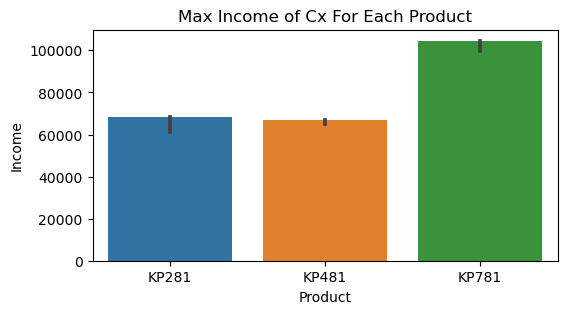

In [714]:
plt.figure(figsize=(6,3))
sns.barplot(data=aerofit, 
           x='Product',
           y='Income',
           estimator=np.max)
plt.title('Max Income of Cx For Each Product')
plt.show()

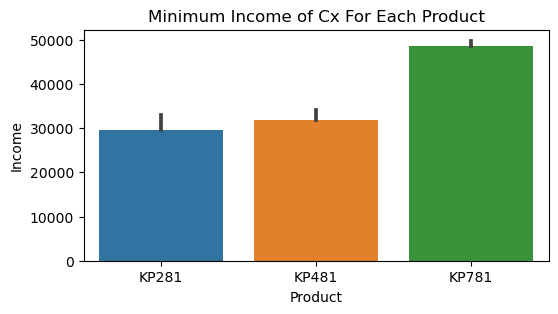

In [715]:
plt.figure(figsize=(6,3))
sns.barplot(data=aerofit, 
           x='Product',
           y='Income',
           estimator=np.min)
plt.title('Minimum Income of Cx For Each Product')
plt.show()

# Condiational & Marginal Probabilities

In [716]:
total = len(aerofit)
per_KP281 = round(len(no_KP281)/total, 2)
per_KP481 = round(len(no_KP481)/total, 2)
per_KP781 = round(len(no_KP781)/total, 2)
print(per_KP281, per_KP481, per_KP781)

0.44 0.33 0.22


In [717]:
pd.crosstab(index= aerofit['Gender'], columns=aerofit['Product'], margins= True)

Product,KP281,KP481,KP781,All
Gender,,,,
F,40,29,7,76
M,40,31,33,104
All,80,60,40,180


In [718]:
pd.crosstab(index= aerofit['Gender'], 
            columns=aerofit['Product'], margins= True, normalize=True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
F,22.222222,16.111111,3.888889,42.222222
M,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


In [719]:
pd.crosstab(index= aerofit['Gender'], 
            columns=aerofit['Product'], margins= True, normalize='columns')*100

Product,KP281,KP481,KP781,All
Gender,,,,
F,50.0,48.333333,17.5,42.222222
M,50.0,51.666667,82.5,57.777778


In [720]:
total_no_high_end_treadmill = aerofit[aerofit['Product']=='KP781']
no_male_buying_highend_treadmill = aerofit[(aerofit['Product']=='KP781') & (aerofit['Gender']=='M')]
Prob_male_buying_highend_treadmill = len(no_male_buying_highend_treadmill) / len(total_no_high_end_treadmill)
Prob_male_buying_highend_treadmill

0.825

In [721]:
pd.crosstab(index= aerofit['Gender'], 
            columns=aerofit['Product'], margins= True, normalize='index')*100

Product,KP281,KP481,KP781
Gender,,,
F,52.631579,38.157895,9.210526
M,38.461538,29.807692,31.730769
All,44.444444,33.333333,22.222222


In [722]:
aerofit.groupby(['Gender', 'Product'])['Income'].mean().unstack()

Product,KP281,KP481,KP781
Gender,,,
F,46020.075,49336.448276,73633.857143
M,46815.975,48634.258065,75825.030303


Male and Female have almost equal probability for buying the lower and mid range treadmil. However, the high end treadmill is baught way more by males than females. Hence it changes the entire figure of buying the treadmill by Male and Female customers.


# 👆 Probability of Male customers buying the high end treadmill = 0.825                                              
                                                        

In [723]:
pd.crosstab(index= aerofit['Gender'], columns=aerofit['MaritalStatus'], margins= True)

MaritalStatus,Partnered,Single,All
Gender,,,
F,46,30,76
M,61,43,104
All,107,73,180


Overall, parnered people have baught more treadmills than singles

In [728]:
pd.crosstab(index= aerofit['Gender'], columns=aerofit['MaritalStatus'], 
            margins= True, normalize='columns')*100

MaritalStatus,Partnered,Single,All
Gender,,,
F,42.990654,41.09589,42.222222
M,57.009346,58.90411,57.777778


In [724]:
no_partnered_cx = aerofit[aerofit['MaritalStatus']=='Partnered']
no_male_among_partnered_cx = aerofit[(aerofit['MaritalStatus']=='Partnered') &(aerofit['Gender']=='M')]
no_female_among_partnered_cx = aerofit[(aerofit['MaritalStatus']=='Partnered') &(aerofit['Gender']=='F')]
Prob_male_partnered_cx = len(no_male_among_partnered_cx) / len(no_partnered_cx)
Prob_female_partnered_cx = len(no_female_among_partnered_cx) / len(no_partnered_cx)
print(round(Prob_male_partnered_cx, 2))
print(round(Prob_female_partnered_cx, 2))

0.57
0.43


# 👆 Probability of Male customers among partnered = 0.57 and female among partnered = 0.43                                              
                                                        

In [725]:
no_single_cx = aerofit[aerofit['MaritalStatus']=='Single']
no_male_among_single_cx = aerofit[(aerofit['MaritalStatus']=='Single') &(aerofit['Gender']=='M')]
no_female_among_single_cx = aerofit[(aerofit['MaritalStatus']=='Single') &(aerofit['Gender']=='F')]
Prob_male_single_cx = len(no_male_among_single_cx) / len(no_single_cx)
Prob_female_single_cx = len(no_female_among_single_cx) / len(no_single_cx)
print(round(Prob_male_single_cx, 2))
print(round(Prob_female_single_cx, 2))

0.59
0.41


# 👆 Probability of Male among single = 0.59 and female among single = 0.41                    

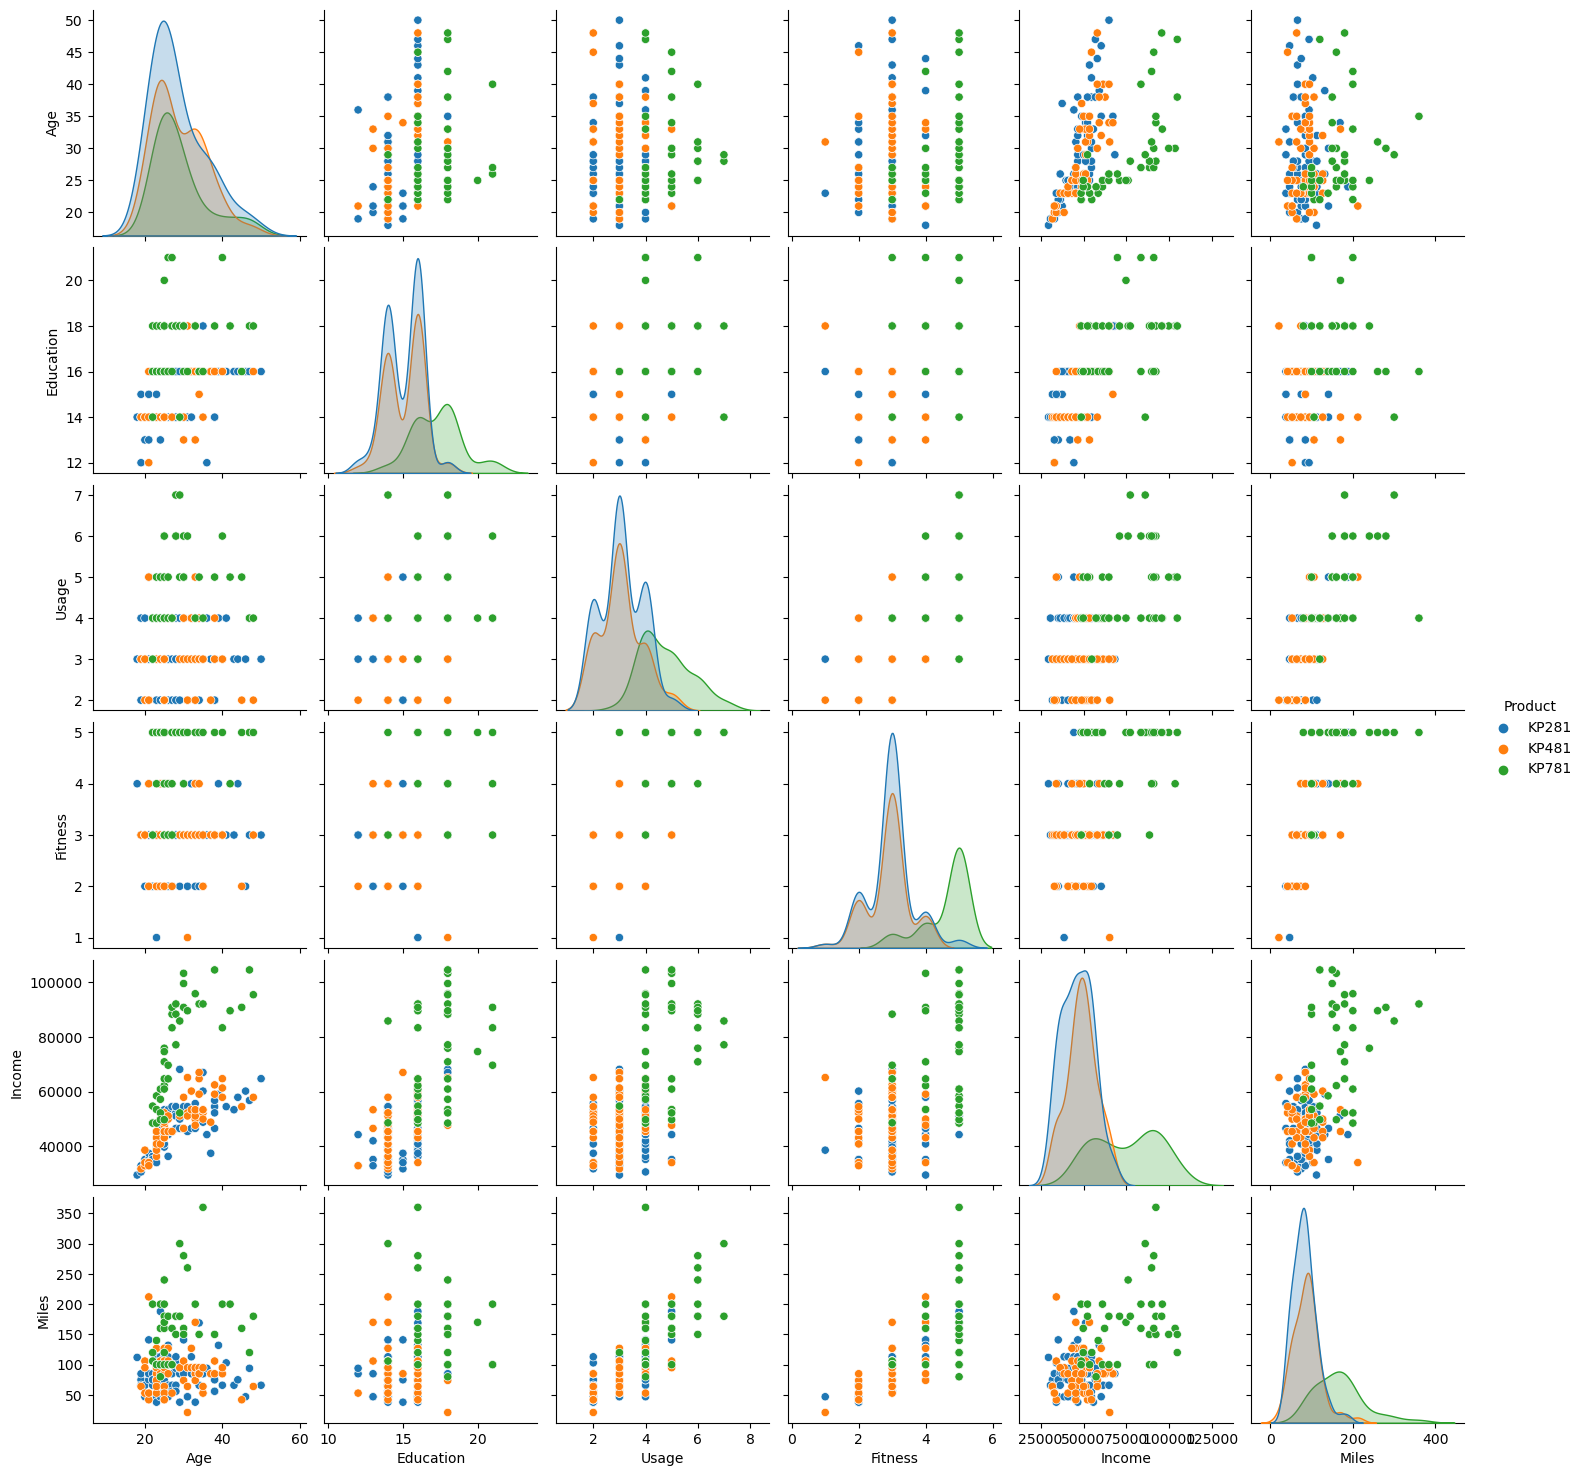

In [501]:
sns.pairplot(aerofit, hue='Product')
plt.show()

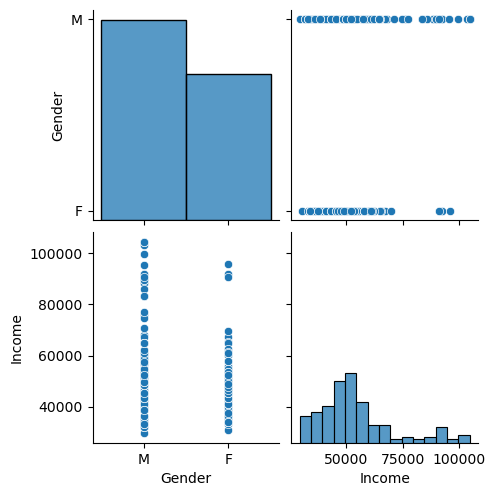

In [453]:
sns.pairplot(aerofit, vars=['Gender', 'Income'])
plt.show()

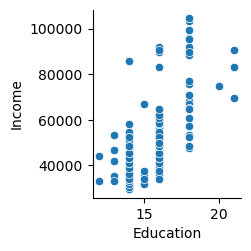

In [456]:
sns.pairplot(aerofit, x_vars=['Education'], y_vars=['Income'])
plt.show()

In [242]:
aerofit.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

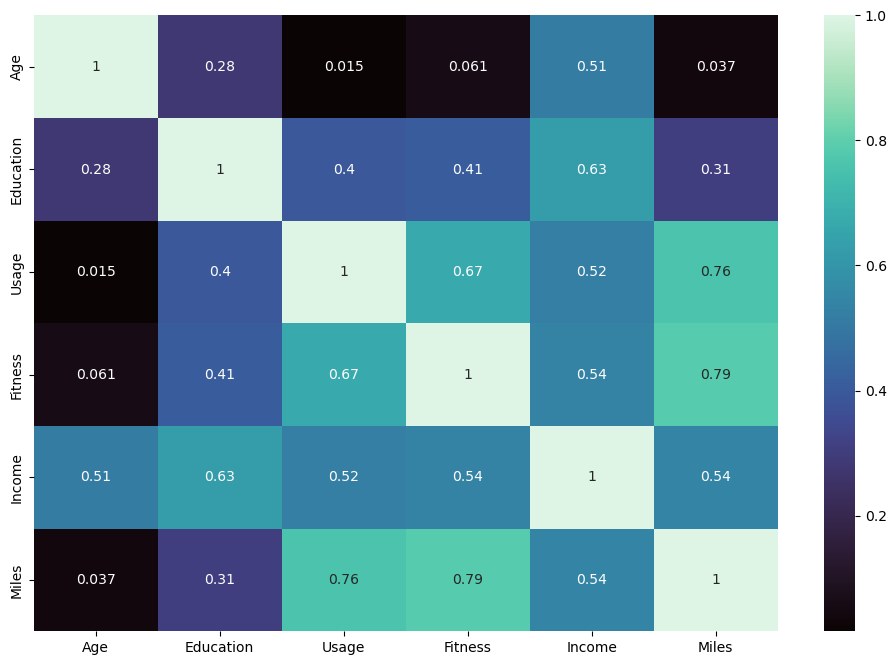

In [628]:
plt.figure(figsize=(12,8))
sns.heatmap(aerofit.corr(), annot=True, cmap='mako')

# 👆 Correlation between different factors can be noticed above in the pairplot & Heat map. 
High Correlation b/w= 'Education & Income', 'Usage & Fitness', 'Miles & Fitness', 'Miles & Usage'
                                                        

## Summary

- Average age of customer 28.
- KP281 Product has highest contribution , having 44% records in the data.
- There are more Male customers (57.8%) than Female customers (42.2%).
- Data shows 59.4% Partnered customers.
- Most of the customers with Low and middel income buy Model KP281 and KP481.
- Customers buying treadmill before the age of 20 and after 40 are very less.

# Recommendations:

1. The most affordable product among all is the best selling and most common among the 'Low Range' income people. The Company can utilize this as an opportunity of mass production for cost management or increased margin.
2. The company should target the single people with 'Mid Range' income with more lucrative offers and discounts in order to generate more revenue by selling more of the most expensive product.
3. Although most of the buyers are middle aged, but as shown by the outliers, it is not a hinderance. The company can focus on people more than 40 years as well as they are the people with good income.
4. Couple discount or a combo offer of treadmill with another fitness equipment for married people can be thought over.
5. Youngsters are focused on their fitness, they can afford to spend some money on it. The company can target them with all 3 products for all income group and education level.
6. Higher Education = More health awareness & Good Income as well. The company can directly market its products to the more Educated people with a little less worry about their Income and Age.
7. Men are buying the most when it comes o the most expensive, good quality treadmill. They prefer quality over money. Hence the company should focus more on showcasing good features and quality to them on digital marketing platforms.
